In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
df.loc[df.duplicated(keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [7]:
df = df.drop_duplicates()
df.shape

(302, 14)

In [8]:
## EDA
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

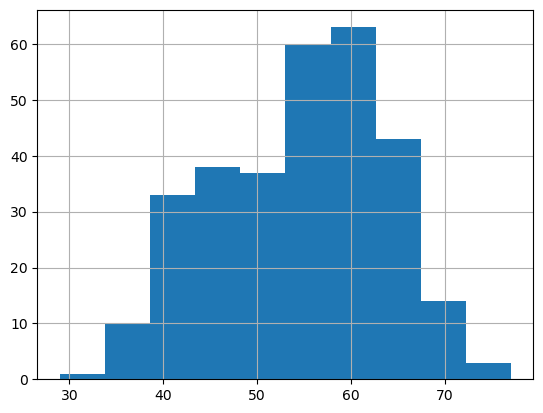

In [9]:
df['age'].hist()
plt.show()

C:\Users\chinni\AppData\Local\Temp\ipykernel_17436\2019826066.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df['sex']==1, 'age'], label='Female')
C:\Users\chinni\AppData\Local\Temp\ipykernel_17436\2019826066.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df['sex']==0, 'a

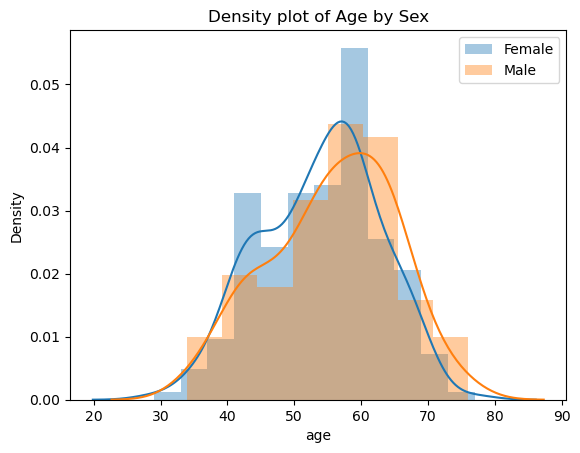

In [10]:
## Density plot of Age by Sex
sns.distplot(df.loc[df['sex']==1, 'age'], label='Female')
sns.distplot(df.loc[df['sex']==0, 'age'], label='Male')

plt.legend()
plt.title("Density plot of Age by Sex")
plt.show()

In [11]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

C:\Users\chinni\AppData\Local\Temp\ipykernel_17436\1917433447.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['trestbps'])


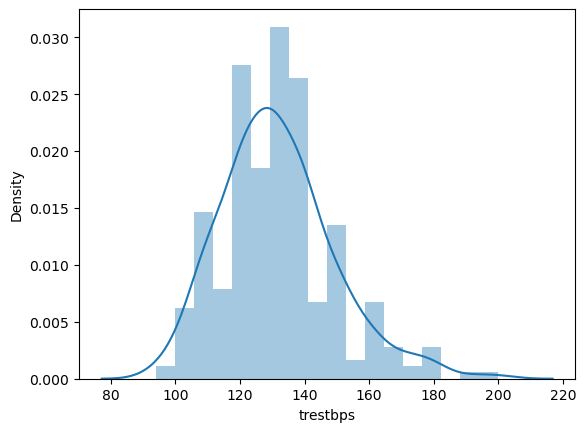

In [12]:
## Trestbps
sns.distplot(df['trestbps'])
plt.show()

In [13]:
df['chol']

0      233
1      250
2      204
3      236
4      354
      ... 
298    241
299    264
300    193
301    131
302    236
Name: chol, Length: 302, dtype: int64

In [14]:
# ?sns.boxplot

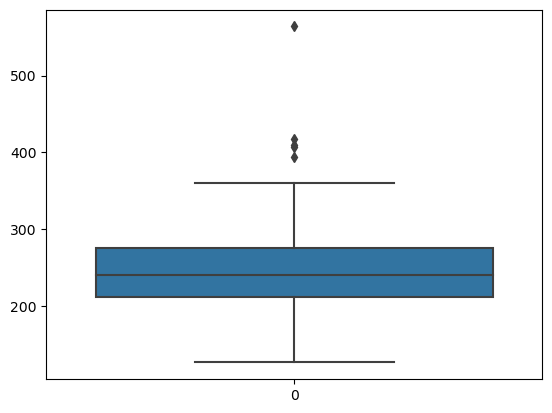

In [15]:
## Boxplot
sns.boxplot(df['chol'], orient='v')
plt.show()

In [16]:
df['chol'].describe()

count    302.000000
mean     246.500000
std       51.753489
min      126.000000
25%      211.000000
50%      240.500000
75%      274.750000
max      564.000000
Name: chol, dtype: float64

In [18]:
def outlier_with_zscore(data):
    outliers = []
    avg = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score = (i-avg)/std
        if (z_score>3)|(z_score<-3):
            outliers.append(i)
            
    return outliers

In [19]:
outliers_list = outlier_with_zscore(df['chol'])

df['chol'] = np.where(df['chol'].isin(outliers_list), df['chol'].median(), df['chol'])
df['chol'].describe()

count    302.000000
mean     243.735099
std       45.458089
min      126.000000
25%      211.000000
50%      240.250000
75%      273.000000
max      394.000000
Name: chol, dtype: float64

In [20]:
outliers_list

[417, 564, 407, 409]

In [21]:
def outliers(x):
    if ((x.dtype == 'int') or (x.dtype == 'float')):
        x=x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99))
    else:
        x
    return x

In [22]:
tmp=outliers(df['chol'])

In [23]:
tmp.describe()

count    302.000000
mean     243.733642
std       44.619532
min      149.000000
25%      211.000000
50%      240.250000
75%      273.000000
max      352.890000
Name: chol, dtype: float64

In [24]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233.0,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250.0,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204.0,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236.0,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354.0,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192.0,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294.0,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263.0,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199.0,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168.0,0,1,174,0,1.6,2,0,2,1


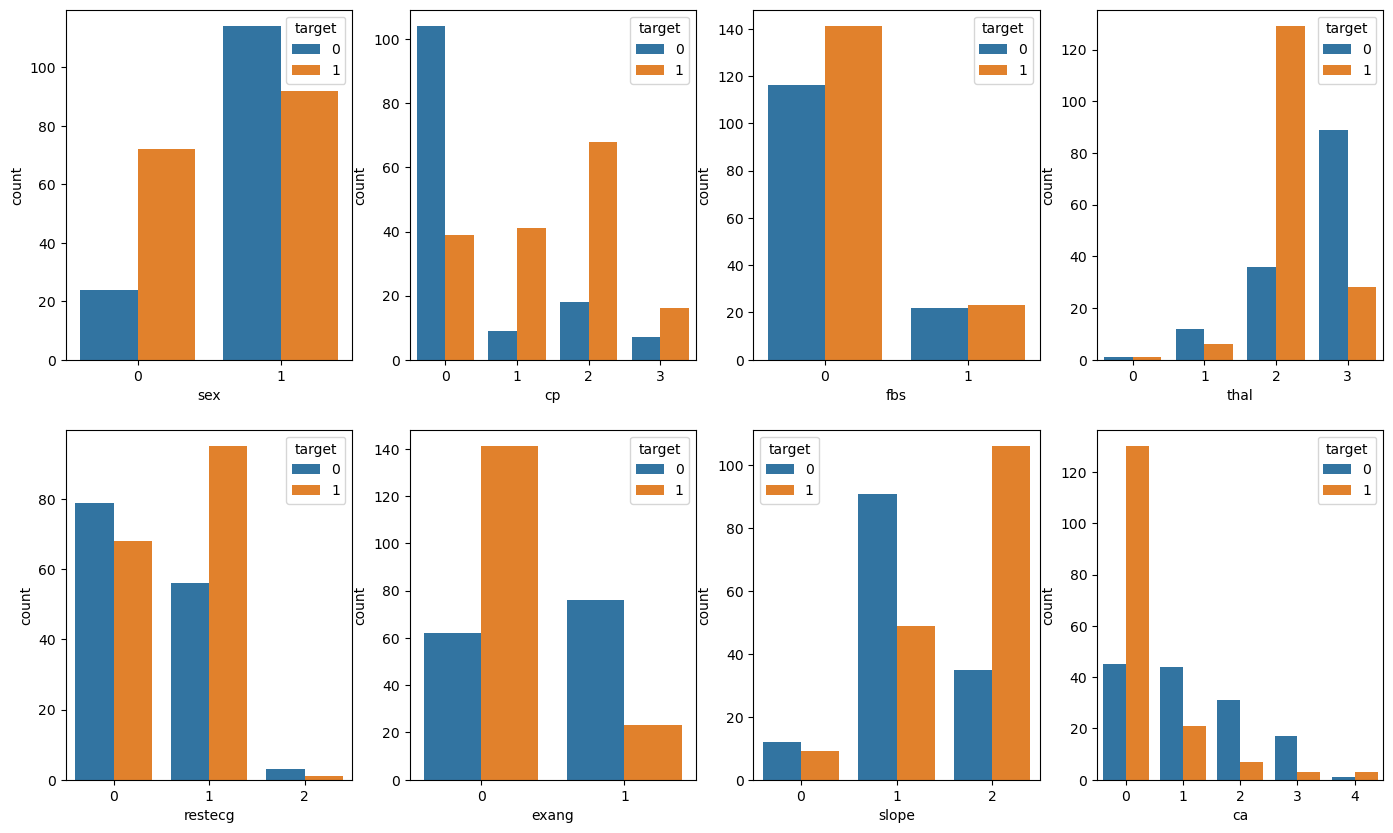

In [25]:
cat_variables = ['sex', 'cp', 'fbs', 'thal', 'restecg', 'exang', 'slope', 'ca']

fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize=(17,10))

for index, column in enumerate(cat_variables):
    ax = axes[int(index/4), index%4]
    sns.countplot(x = column, hue='target', data=df, ax=ax)

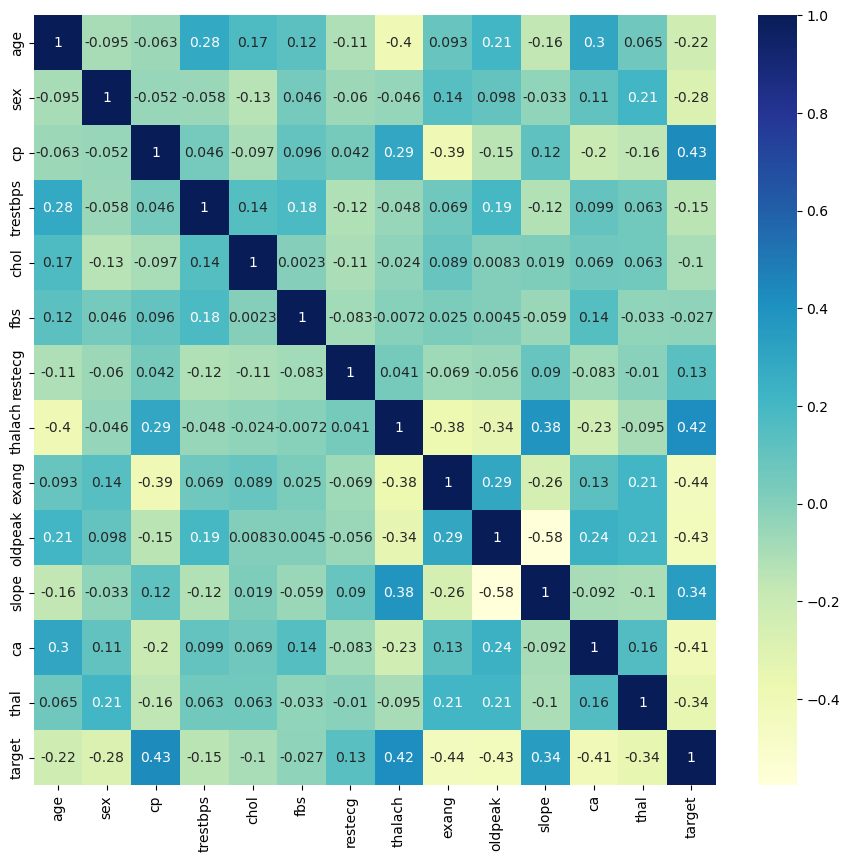

In [26]:
## Correlation

plt.figure(figsize=(11,10))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [27]:
### Modelling

X = df.drop('target', axis=1)
y= df['target']

In [28]:
X.shape

(302, 13)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(241, 13)
(61, 13)


In [31]:
## Create decision tree model
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
## Validate model
y_pred = model.predict(X_test)


In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [34]:
confusion_matrix(y_test, y_pred)

array([[20, 12],
       [ 4, 25]], dtype=int64)

In [35]:
accuracy_score(y_test, y_pred)

0.7377049180327869

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.62      0.71        32
           1       0.68      0.86      0.76        29

    accuracy                           0.74        61
   macro avg       0.75      0.74      0.74        61
weighted avg       0.76      0.74      0.73        61



In [37]:
y_pred_train = model.predict(X_train)

accuracy_score(y_train, y_pred_train)

1.0

In [38]:
model_v2 = DecisionTreeClassifier(max_depth=3, min_samples_leaf=20, max_features=0.6)
model_v2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_features=0.6, min_samples_leaf=20)

In [39]:
y_pred_v2 = model_v2.predict(X_test)

accuracy_score(y_pred_v2, y_test)

0.819672131147541

In [40]:
y_pred_train_v2 = model_v2.predict(X_train)

accuracy_score(y_pred_train_v2, y_train)

0.8132780082987552

In [41]:
## Optimal max depth
max_depth_values = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for depth in max_depth_values:
    model = DecisionTreeClassifier(max_depth=depth, criterion='gini', min_samples_leaf=10)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    
    print(f"Depth: {depth}, Accuracy: {acc_score}")

Depth: 2, Accuracy: 0.7540983606557377
Depth: 3, Accuracy: 0.8524590163934426
Depth: 4, Accuracy: 0.7540983606557377
Depth: 5, Accuracy: 0.7540983606557377
Depth: 6, Accuracy: 0.7540983606557377
Depth: 7, Accuracy: 0.7540983606557377
Depth: 8, Accuracy: 0.7540983606557377
Depth: 9, Accuracy: 0.7540983606557377
Depth: 10, Accuracy: 0.7540983606557377
Depth: 11, Accuracy: 0.7540983606557377
Depth: 12, Accuracy: 0.7540983606557377
Depth: 13, Accuracy: 0.7540983606557377
Depth: 14, Accuracy: 0.7540983606557377
Depth: 15, Accuracy: 0.7540983606557377


In [42]:
?DecisionTreeClassifier